In [2]:
"""
r: Zongyi Li and Daniel Zhengyu Huang
"""

from train_1d import *
################################################################
# configs
################################################################
# load data
PATH = "/groups/esm/dzhuang/Catheter/"
INPUT_INFO = PATH+"info_1d_data.npy"
dataInfo = np.load(INPUT_INFO)


device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model = torch.load("catheter_plain_model_1d500", map_location=device)

print(count_params(model))


5325953


rel. error is  0.064275734
rel. error is  0.07191253
rel. error is  0.12284009
rel. error is  0.015935201
rel. error is  0.15599063
rel. error is  0.016762892
rel. error is  0.11882684
rel. error is  0.025031608
rel. error is  0.023168417
rel. error is  0.06822863


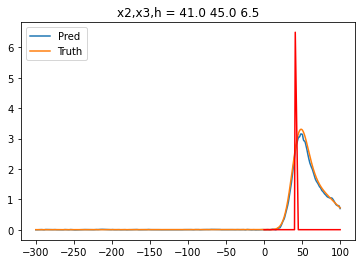

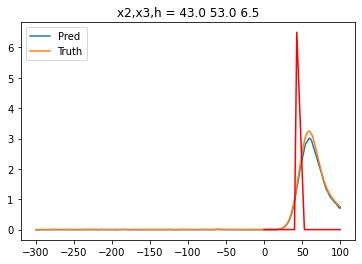

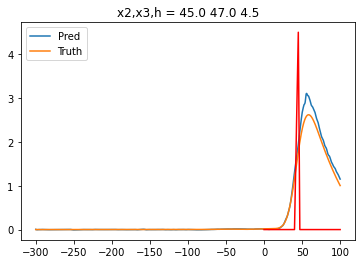

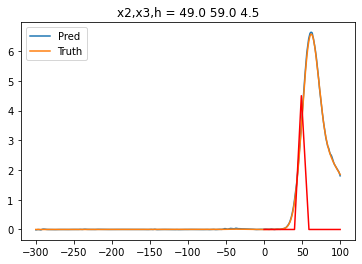

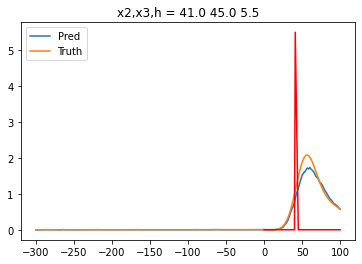

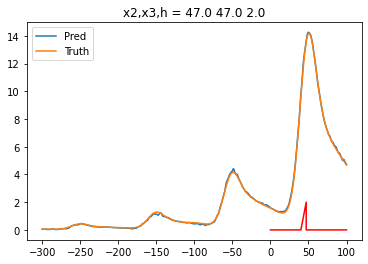

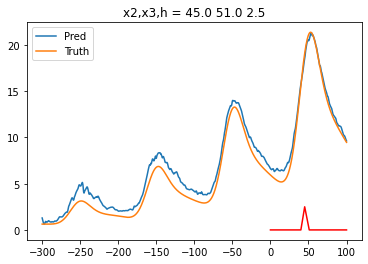

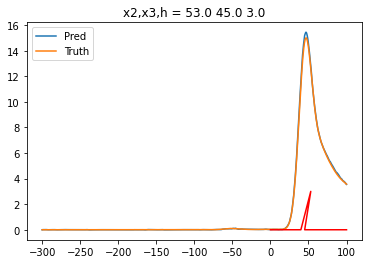

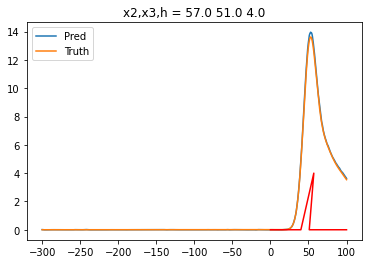

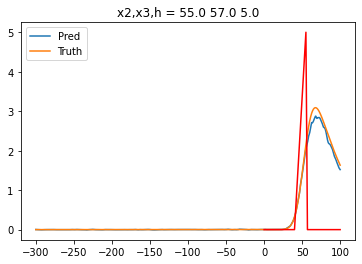

In [4]:
n_periods = 4
for sample_id in range(0,10):
    sample_test_id = test_index[sample_id].item()
    x2, x3, h, theta1, theta2, p, _ = dataInfo[:, sample_test_id]
    bottom_x, bottom_y = np.array([0, 40.0, x2, x3, 100.0]),  np.array([0.0, 0, h, 0, 0.0])

    y_test_pred = model(x_test[sample_id:sample_id+1,:,:].to(device)).detach().cpu().numpy().flatten()
    print("rel. error is ", np.linalg.norm(y_test_pred - y_test[sample_id, :].numpy())/np.linalg.norm(y_test[sample_id, :]))
    xx = np.linspace(-100*(n_periods-1),100,n_periods*1000+1)
    plt.figure()
    plt.plot(xx, y_test_pred, label="Pred")
    plt.plot(xx, y_test[sample_id, :], label="Truth")
    plt.plot(bottom_x, bottom_y, color="r")
    plt.title("x2,x3,h = "+str(x2)+" "+str(x3)+" "+str(h))
    plt.legend()